In [1]:
!pip install yfinance
!pip install pandas 
!pip install requests
!pip install bs4
!pip install html5lib
!pip install ploty
!pip install lxml

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement ploty (from versions: none)
ERROR: No matching distribution found for ploty


Defaulting to user installation because normal site-packages is not writeable


<b>Question 1</b> Extracting Tesla Stock Data Using  <code>yfinance</code> 

In [5]:
import yfinance as yf

tesla=yf.Ticker("TSLA")
data = tesla.history(period="max")
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<b>Question 2</b>  Extracting Tesla Revenue Data Using Webscraping. (consider this link <a href='https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'>link</a>
)

In [62]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [63]:
soup = BeautifulSoup(html_data)

In [64]:
tesla_revenue = pd.DataFrame(columns=["Date","Revenue"])
table = []
table = soup.find_all('tbody')[1]
column_data = table.find_all('tr')
# print(column_data)
for row in column_data:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    l=len(tesla_revenue)
    tesla_revenue.loc[l]= individual_row_data

In [67]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\danie\AppData\Local\Temp\ipykernel_22776\2906399211.py:1: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)


,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


<b>Question 3</b> Extracting GameStop Stock Data Using yfinance

In [19]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


<b>Question 4</b> Extracting GameStop Revenue Data Using Webscraping

In [58]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

In [59]:
soup = BeautifulSoup(html_data)

In [60]:
gme_revenue = pd.DataFrame(columns=["Date","Revenue"])
table = []
table = soup.find_all('tbody')[1]
column_data = table.find_all('tr')
# print(column_data)
for row in column_data:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    l=len(gme_revenue)
    gme_revenue.loc[l]= individual_row_data

In [61]:
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue']!=""]
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('$','').str.replace(',','').astype(float)
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0


<b> Question 5</b> Tesla Stock and Revenue Dashboard 

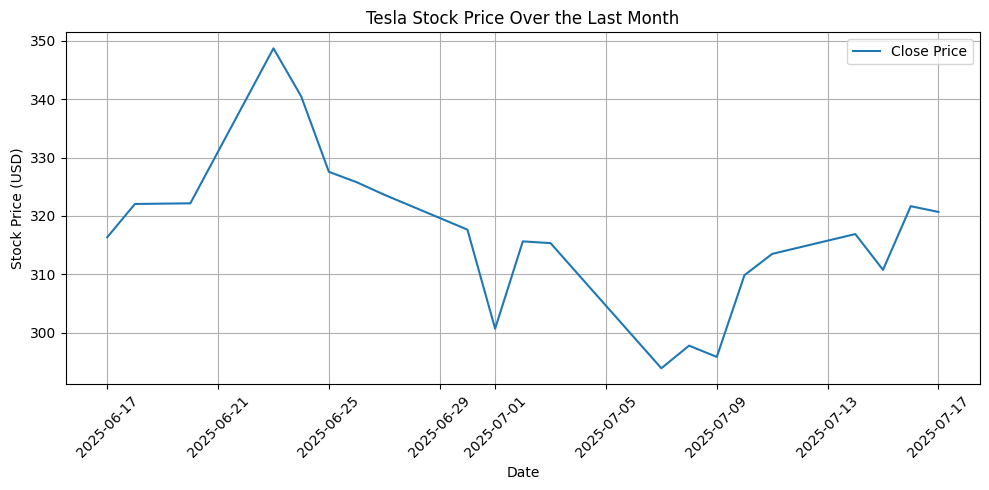

In [17]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10,5))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1mo")
tesla_data.reset_index(inplace=True)

make_graph(tesla_data, "Tesla Stock Price Over the Last Month")

<b>Question 6</b> GameStop Stock and Revenue Dashboard

In [14]:
import yfinance as yf
import matplotlib.pyplot as plt

In [15]:
def make_graph(ticker_symbol, start_date, end_date):
    data = yf.download(ticker_symbol, start=start_date, end=end_date)
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label=f'{ticker_symbol} Closing Price', color='purple')
    plt.title(f"{ticker_symbol} Stock Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_22776\1508519772.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


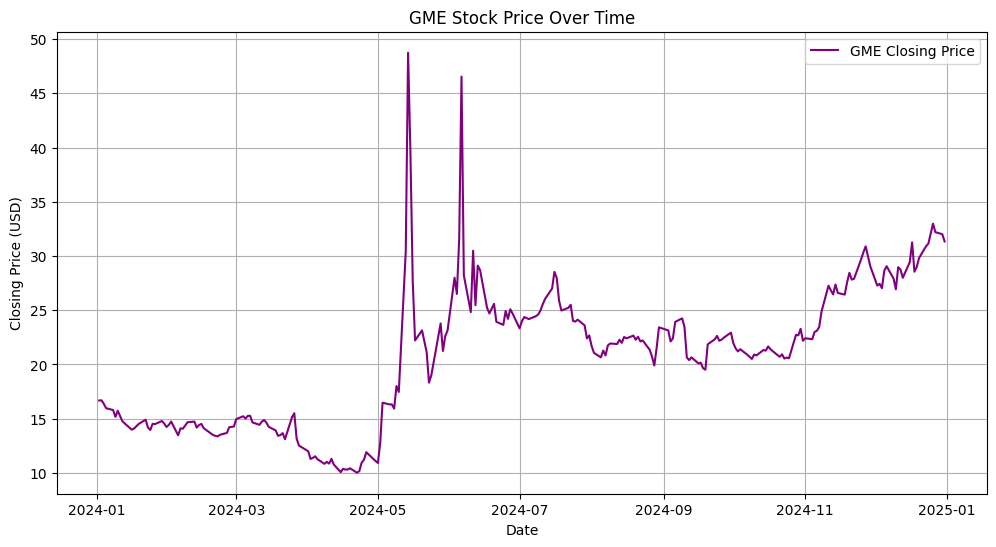

In [16]:
make_graph('GME', '2024-01-01', '2025-01-01')

In [55]:

soup = BeautifulSoup(html_data)

In [56]:
gme_revenue = pd.DataFrame(columns=["Date","Revenue"])
table = []
table = soup.find_all('tbody')[1]
column_data = table.find_all('tr')
# print(column_data)
for row in column_data:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    l=len(gme_revenue)
    gme_revenue.loc[l]= individual_row_data

In [57]:
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue']!=""]
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('$','').str.replace(',','').astype(float)
gme_revenue.tail(5)

,Date,Revenue
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0
